In [3]:
from db.pg import pg_con
from db.verified import report_row_num_un_uuid

In [5]:
recs = get_candidates()

In [15]:
verified_recs = report_row_num_un_uuid()

In [4]:
verified_recs

OrderedDict([(39, 'a4fb182c-9d71-4d62-a405-70947f1dcc4e'),
             (40, 'a4fb182c-9d71-4d62-a405-70947f1dcc4e'),
             (41, 'a4fb182c-9d71-4d62-a405-70947f1dcc4e'),
             (42, 'b4078187-d98c-427f-97f8-cbb421577c9a'),
             (43, '53c1e5b6-6228-4607-9b6d-068c12539b4e'),
             (44, 'abb622fc-f787-44af-b3c5-d1390483c1af'),
             (45, '7e536b41-1c09-464d-a7a0-80156c270f94'),
             (46, '08e34abd-42c4-4931-8f26-079a41e5b2ab'),
             (47, 'abb622fc-f787-44af-b3c5-d1390483c1af'),
             (58, '4cfb7a0d-c994-427c-adb1-081f9f88825b'),
             (59, 'e29a55ef-44b0-4153-976e-7a330bbd140a'),
             (815, '3d7f6e8e-121a-4dab-8b71-0e5aed91af26'),
             (816, '3d7f6e8e-121a-4dab-8b71-0e5aed91af26'),
             (817, '0766899c-4404-42e9-8469-f63ffb5f1839'),
             (818, 'f676c37e-4d0e-40c5-9166-cbf8bbdc3d4b'),
             (819, '37afdd6b-07a5-4dc3-81d1-18165108dc06'),
             (820, '5d32e4e5-3a22-45ff-84cc-528a963

In [10]:
cand_res = dict()
for rsku_row_num, dos, un_id in recs:
    if rsku_row_num not in cand_res:
        cand_res[rsku_row_num] = list()
    docs = cand_res[rsku_row_num]
    docs.append((un_id))

In [16]:
vi = list(verified_recs.items())

In [67]:
res = dict()
not_in_res = list()
for rsku_row_num, un_id in vi:
    if rsku_row_num not in cand_res:
        not_in_res.append(rsku_row_num)
        res[rsku_row_num] = -20
        continue
    items = cand_res[rsku_row_num]
    if un_id not in items:
        res[rsku_row_num] = -20
    else:
        res[rsku_row_num] = items.index(un_id)

In [64]:
def get_candidates():
  q = """
select r."rowNumber", c."degreeOfSimilarity", c."iskuId"
from "Candidates" as c
inner join "RSKUs" as r on c."rskuId" = r.id
order by c."rskuId", c."degreeOfSimilarity" DESC;"""
  conn, cursor = pg_con()
  cursor.execute(q)
  recs = cursor.fetchall()
  conn.close()
  return recs

In [65]:
cand_res

{11: ['42748f8c-11c7-41ea-b349-3d0892ddd608',
  'b77c2cea-bc6b-4c4f-9dd7-37a76212514e',
  '0e4999b4-254a-4835-b187-66c5607b38d0'],
 12: ['b77c2cea-bc6b-4c4f-9dd7-37a76212514e',
  '00b52222-86f4-40b0-88c8-10aaca09dadf',
  '42748f8c-11c7-41ea-b349-3d0892ddd608'],
 13: ['b77c2cea-bc6b-4c4f-9dd7-37a76212514e'],
 25: ['59e90c46-d63c-4a9f-987d-6c3e1bcd8c54',
  'd8795721-ff53-4c0a-becb-d66700db0688',
  'c90cf1c9-0421-45d6-8ef0-775ef812ff23',
  'b2e61583-b810-4143-a46a-e693ce7afd9b',
  '41e83a47-dbe2-45a0-bc2f-139f1b8adbd6'],
 32: ['39a66bc5-357c-4e6d-ad4c-1189307e55d6',
  '29bd0338-5833-40e3-89a9-3bc229d19c3e',
  'fdcba7a6-84a3-4a60-8bf7-b468eba4fd89',
  'd30f22a6-b077-46bf-9104-260c38dfd530',
  '0e73b437-32c1-4080-a29a-3abe2ad157fa',
  'ef333c36-936b-4a40-9d95-64e3a013045c'],
 42: ['777cd880-37a0-4db2-9ebe-8040c7ec3720',
  'a699eee5-be54-40bc-b8bd-66e6c72d1399',
  '9f51ca18-d6e9-4e35-80bf-e41386d346d9',
  '40e870a5-4405-43cb-b813-db1cabcd7e8a',
  '1382bf78-cba6-4c1a-85b1-43c0d155434c',
  'ab

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bac06a0>]],
      dtype=object)

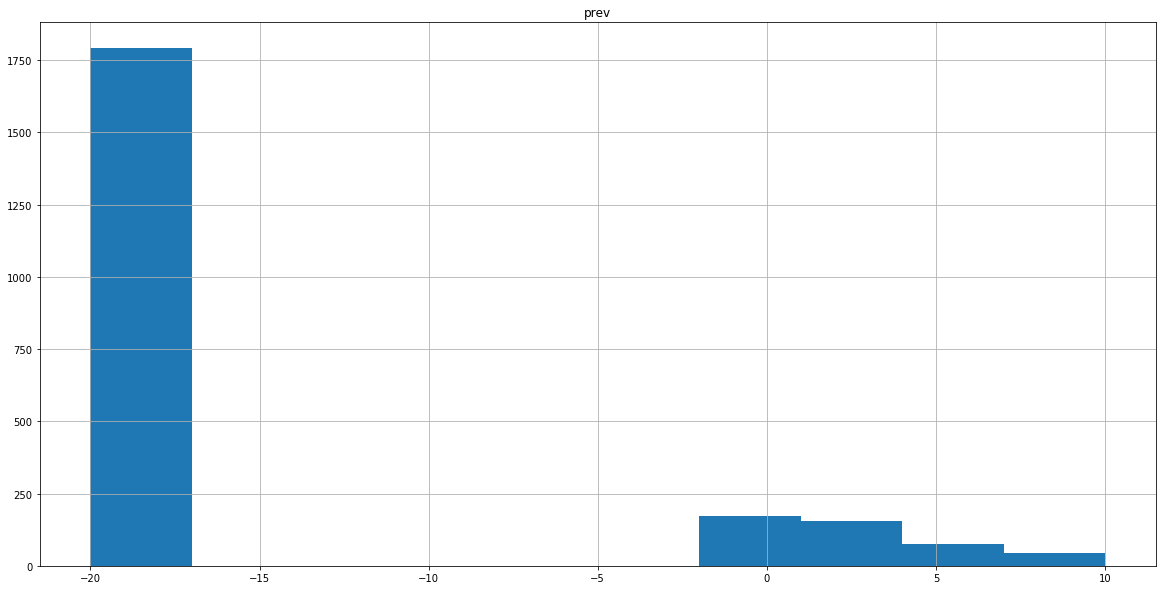

In [68]:
items = sorted(res.items(), key=lambda t: t[0])
prev_val = [val for col, val in items]
idx = [col for col, val in items]
df5 = pd.DataFrame({'prev': prev_val}, columns=['prev', 'cur'], index=idx)
# df5.plot.barh(stacked=True, width=.97, figsize=(20,10), rot=0)
df5.hist(figsize=(20,10))

<Figure size 432x288 with 0 Axes>

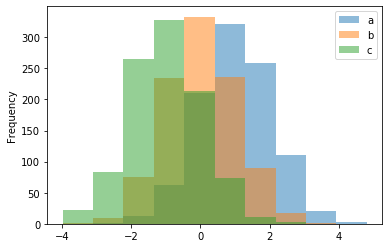

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
plt.figure()
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df4.plot.hist(alpha=0.5)


In [36]:
df4

,a,b,c
0,-0.008330,-0.045295,-0.645056
1,0.868639,0.008876,0.808659
2,-0.393812,0.403162,-1.949825
3,1.372289,0.275311,0.567591
4,4.360885,-0.200939,-0.010697
...,...,...,...
995,2.490027,-0.307981,-0.066257
996,2.023954,-2.107629,-0.599428
997,-1.268438,-2.295215,-1.482331
998,1.342141,-0.183128,-1.405406


In [70]:
10 % 3

1